In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# import missingno as mns
import scipy.cluster.hierarchy as sch
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
#from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

In [3]:
#importing, reading the dataset and data exploration
Wines = pd.read_csv('Wine_Clusters.csv')
Wines.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
#Dataset Explorations
Wines.shape

(178, 13)

In [6]:
Wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [7]:
Wines.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


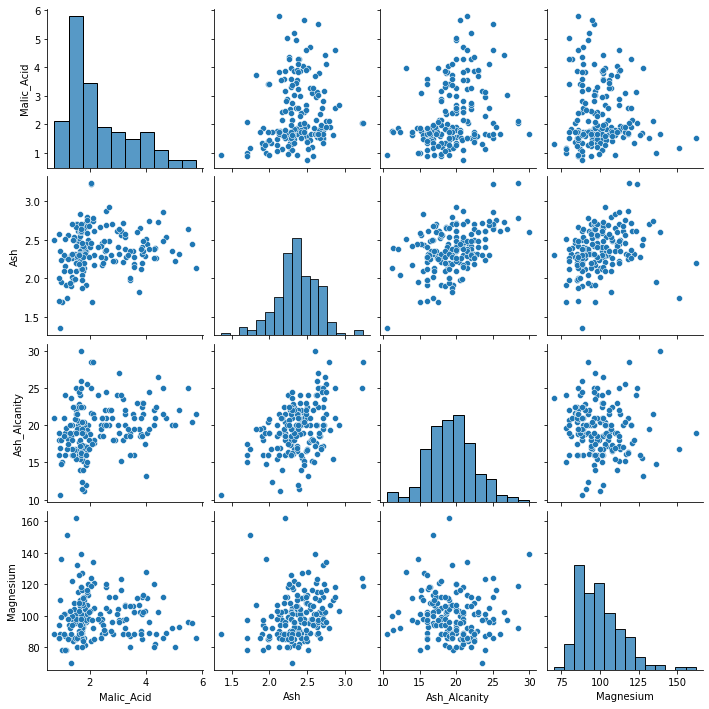

In [9]:
#initial cluster visualization and comparison
X =Wines.iloc[:,1:5]
sns.pairplot(X)

In [10]:
# Normalization of the dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(Wines)

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.p

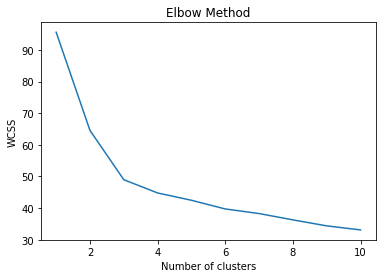

In [11]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
# optimalizing number of clusters
n_clusters = 3  # chosen based on the elbow method
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(data_scaled)

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [13]:
#using PCA method to reduce dataset dimensionality 
#and cannot visualize scatterplot for such 
from sklearn.decomposition import PCA

ps = PCA(n_components=2)
f_reduced = ps.fit_transform(data_scaled)

ps.explained_variance_ratio_

array([0.40749485, 0.18970352])

In [14]:
#summing variance ratio to know percentage of retained original variance
#about 60% of  variance retained
sum(ps.explained_variance_ratio_)

0.5971983633884046

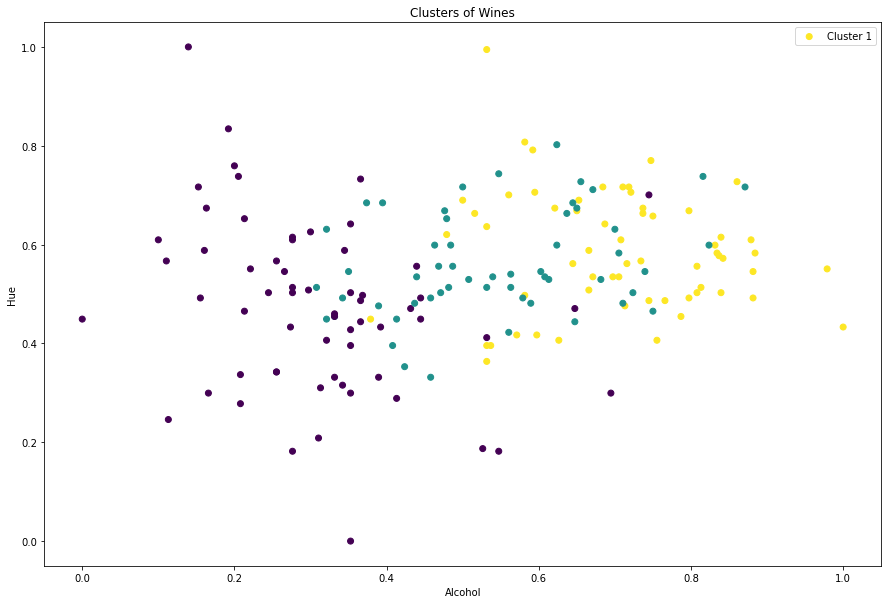

In [16]:
import matplotlib.pyplot as plt

# Define cluster labels
cluster_labels = kmeans.labels_

# Define label names
label_names = ['Cluster 1', 'Cluster 2', 'Cluster 3']

# Visualizing the clusters
plt.figure(figsize=(15,10))
plt.scatter(data_scaled[:, 0], data_scaled[:, 2], c=cluster_labels)
plt.title('Clusters of Wines')
plt.xlabel('Alcohol')
plt.ylabel('Hue')
plt.legend(label_names)
plt.show()


Text(0.5, 1.0, 'Clusters of Wines Composition')

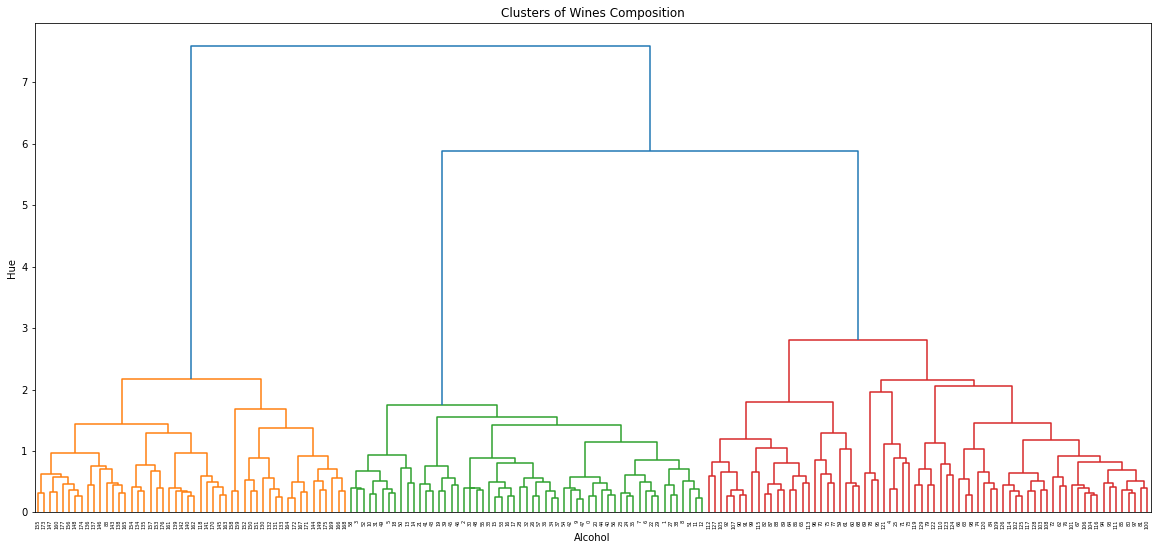

In [17]:
# APPLICATION OF HIERARCHICAL CLUSTERING
#finding the number of clusters using dendogram
plt.figure(figsize=(20,9))
dendrogram = sch.dendrogram(sch.linkage(data_scaled,method ='ward'))
plt.xlabel('Alcohol')
plt.ylabel('Hue')
plt.title('Clusters of Wines Composition')

In [18]:
#OPTIMIZATION
hc = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')
y_means2=hc.fit_predict(data_scaled)

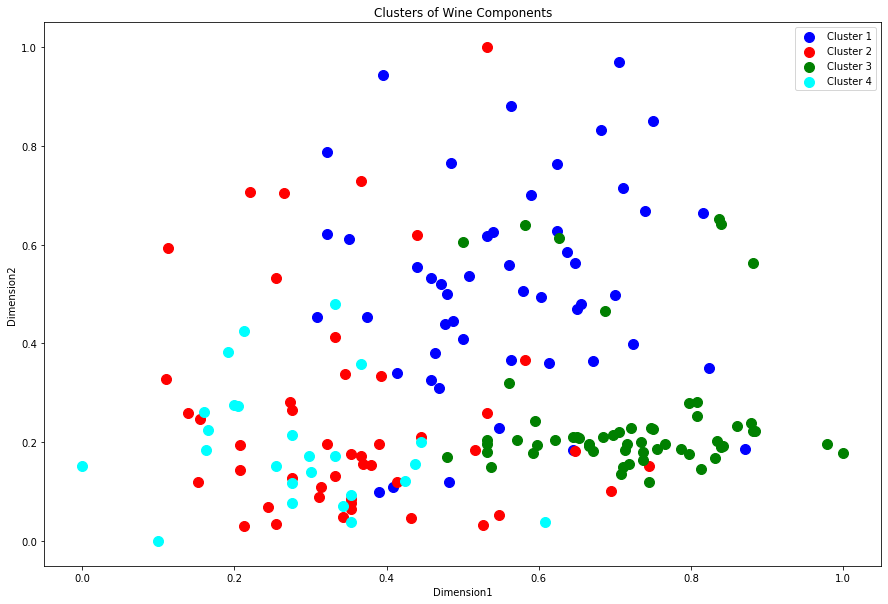

In [19]:
#visualization of the clusters
#plt.style.use('ggplot')
plt.figure(figsize=(15,10))
plt.scatter(data_scaled[y_means2==0,0],data_scaled[y_means2==0,1],c='blue', s=100,label='Cluster 1')
plt.scatter(data_scaled[y_means2==1,0],data_scaled[y_means2==1,1],c='red', s=100,label ='Cluster 2')
plt.scatter(data_scaled[y_means2==2,0],data_scaled[y_means2==2,1],c='green', s=100,label='Cluster 3')
plt.scatter(data_scaled[y_means2==3,0],data_scaled[y_means2==3,1],c='cyan', s=100,label ='Cluster 4')

plt.title('Clusters of Wine Components')
plt.xlabel('Dimension1')
plt.ylabel('Dimension2')
plt.legend()
plt.show()